# Info del Dataset
Este conjunto de datos proporciona información sobre los salarios y atributos de empleo de los ingenieros de datos para el año 2024. Incluye información como salario, título del trabajo, nivel de experiencia, tipo de empleo, residencia del empleado, proporción de trabajo remoto, ubicación de la empresa y tamaño de la empresa. El conjunto de datos permite el análisis de tendencias salariales, patrones de empleo y variaciones geográficas en los roles de ingeniería de datos. Puede ser utilizado por investigadores, analistas y organizaciones para comprender el panorama en evolución del empleo y la compensación en ingeniería de datos.

Archivo a cargar en: https://drive.google.com/drive/folders/1waI3LyDH7xLZVM_Qmqkdp2lz5o08x5MC?usp=sharing

## Descripción de las características:
*	**work_year**: El año en que se recopilaron los datos (2024).
*	**experience_level**: El nivel de experiencia del empleado, categorizado como SE (Ingeniero Senior), MI (Ingeniero de Nivel Medio) o EL (Ingeniero de Nivel Inicial).
*	**employment_type**: El tipo de empleo, como tiempo completo (FT), medio tiempo (PT), contrato (C) o freelance (F).
*	**job_title**: El título o rol del empleado dentro de la empresa, por ejemplo, AI Engineer.
*	**salary**: El salario del empleado en la moneda local (por ejemplo, 202,730 USD).
*	**salary_currency**: La moneda en la que se denomina el salario (por ejemplo, USD).
*	**salary_in_usd**: El salario convertido a dólares estadounidenses para fines de estandarización.
*	**employee_residence**: El país de residencia del empleado.
*	**remote_ratio**: La proporción que indica el grado de trabajo remoto permitido en la posición (0 para sin trabajo remoto, 1 para totalmente remoto).
*	**company_location**: La ubicación de la empresa donde el empleado está empleado.
*	**company_size**: El tamaño de la empresa, a menudo categorizado por el número de empleados (S para pequeña, M para mediana, L para grande).


In [2]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
url = "/content/Dataset-DataScience_salaries_2024.csv"
df = pd.read_csv(url)

# Mostrar las primeras filas del dataset
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L


In [3]:
# Info del dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14838 non-null  int64 
 1   experience_level    14838 non-null  object
 2   employment_type     14838 non-null  object
 3   job_title           14838 non-null  object
 4   salary              14838 non-null  int64 
 5   salary_currency     14838 non-null  object
 6   salary_in_usd       14838 non-null  int64 
 7   employee_residence  14838 non-null  object
 8   remote_ratio        14838 non-null  int64 
 9   company_location    14838 non-null  object
 10  company_size        14838 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB
None


In [4]:
# Filas, Columnas
print(df.shape)

(14838, 11)


In [5]:
# Estadísticas descriptivas del dataset:
print(df.describe())

          work_year        salary  salary_in_usd  remote_ratio
count  14838.000000  1.483800e+04   14838.000000  14838.000000
mean    2023.138900  1.650227e+05  149874.718763     32.760480
std        0.700799  3.562354e+05   69009.181349     46.488278
min     2020.000000  1.400000e+04   15000.000000      0.000000
25%     2023.000000  1.021000e+05  102000.000000      0.000000
50%     2023.000000  1.422000e+05  141300.000000      0.000000
75%     2024.000000  1.875000e+05  185900.000000    100.000000
max     2024.000000  3.040000e+07  800000.000000    100.000000


In [6]:
# Importando librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import zscore, shapiro
import joblib
import statsmodels.api as sm

In [7]:
# Verificar si hay valores nulos
print(df.isnull().sum())

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [8]:
# Detección y manejo de outliers
# Eliminar outliers utilizando el método IQR

Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df['salary_in_usd'] >= lower_bound) & (df['salary_in_usd'] <= upper_bound)]
print(df_no_outliers.info())
print(df_no_outliers.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 14568 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14568 non-null  int64 
 1   experience_level    14568 non-null  object
 2   employment_type     14568 non-null  object
 3   job_title           14568 non-null  object
 4   salary              14568 non-null  int64 
 5   salary_currency     14568 non-null  object
 6   salary_in_usd       14568 non-null  int64 
 7   employee_residence  14568 non-null  object
 8   remote_ratio        14568 non-null  int64 
 9   company_location    14568 non-null  object
 10  company_size        14568 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.3+ MB
None
          work_year        salary  salary_in_usd  remote_ratio
count  14568.000000  1.456800e+04   14568.000000  14568.000000
mean    2023.134541  1.608093e+05  145420.005903     33.003844
std        0.700219  3.57726

In [9]:
# Aplicamos la transformación Box-Cox para mejorar la normalidad de los datos.
from scipy.stats import boxcox

# Transformación Box-Cox
df_no_outliers.loc[:, 'boxcox_salary'], fitted_lambda = boxcox(df_no_outliers['salary_in_usd'])

# Verificar la normalidad nuevamente
from scipy.stats import shapiro
stat, p = shapiro(df_no_outliers['boxcox_salary'])
print(f'Estadístico Shapiro-Wilk: {stat}, p-valor: {p}')

Estadístico Shapiro-Wilk: 0.9969459176063538, p-valor: 9.733764478412008e-17


<ipython-input-9-7c6a4b6dc0d5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.loc[:, 'boxcox_salary'], fitted_lambda = boxcox(df_no_outliers['salary_in_usd'])
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


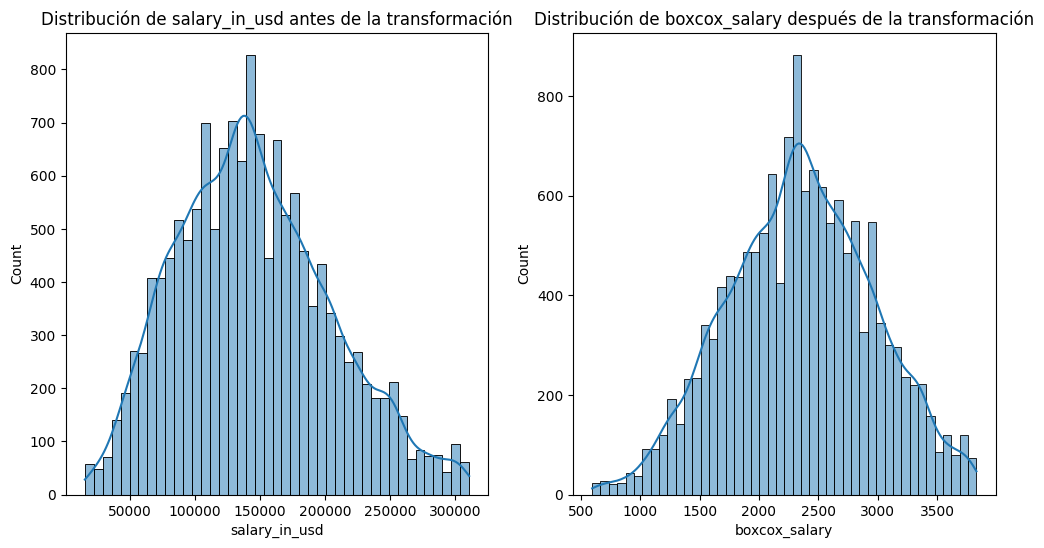

In [10]:
# Gráfico de la distribución de salary_in_usd antes de la transformación
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_no_outliers['salary_in_usd'], kde=True)
plt.title('Distribución de salary_in_usd antes de la transformación')

# Gráfico de la distribución de boxcox_salary después de la transformación
plt.subplot(1, 2, 2)
sns.histplot(df_no_outliers['boxcox_salary'], kde=True)
plt.title('Distribución de boxcox_salary después de la transformación')
plt.show()

In [11]:
# Convertir características categóricas a variables dummy
X = df_no_outliers[['experience_level', 'employment_type', 'job_title', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']]
X = pd.get_dummies(X, drop_first=True)
y = df_no_outliers['boxcox_salary']

# Dividir el conjunto de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
#Entrenamos y evaluamos el modelo KNN.
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Definir los parámetros a ajustar
param_grid = {'n_neighbors': range(1, 21)}

# Configurar el Grid Search
grid_search = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f'Mejores parámetros: {best_params}')

# Entrenar el modelo con los mejores parámetros
best_knn_model = KNeighborsRegressor(n_neighbors=best_params['n_neighbors'])
best_knn_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_best_knn = best_knn_model.predict(X_test)
mse_best_knn = mean_squared_error(y_test, y_pred_best_knn)
r2_best_knn = r2_score(y_test, y_pred_best_knn)

print(f'Error Cuadrático Medio (MSE) - Mejor KNN: {mse_best_knn}')
print(f'Coeficiente de Determinación (R^2) - Mejor KNN: {r2_best_knn}')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejores parámetros: {'n_neighbors': 15}
Error Cuadrático Medio (MSE) - Mejor KNN: 244814.80545347894
Coeficiente de Determinación (R^2) - Mejor KNN: 0.3491235291761565


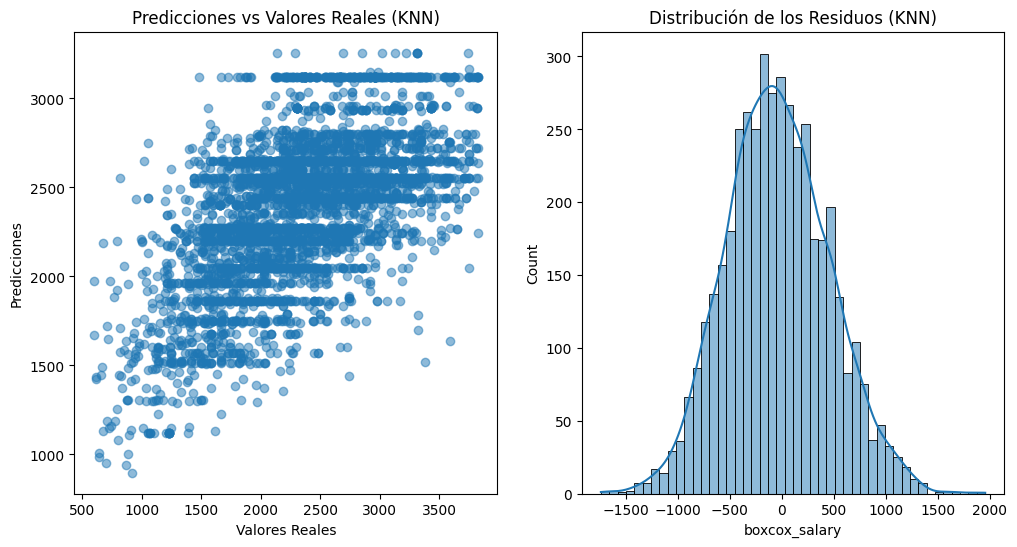

In [13]:
# Gráfico de dispersión de predicciones vs valores reales
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_best_knn, alpha=0.5)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales (KNN)')

# Gráfico de distribución de los residuos
residuos = y_test - y_pred_best_knn
plt.subplot(1, 2, 2)
sns.histplot(residuos, kde=True)
plt.title('Distribución de los Residuos (KNN)')
plt.show()

Valores reales originales: 434      300000.0
14602     37120.0
2771     204500.0
10210    113400.0
1393     242000.0
Name: boxcox_salary, dtype: float64
Predicciones originales: [222852.37961271 110515.37333584 114748.06324335 186366.42297605
 222393.85385617]


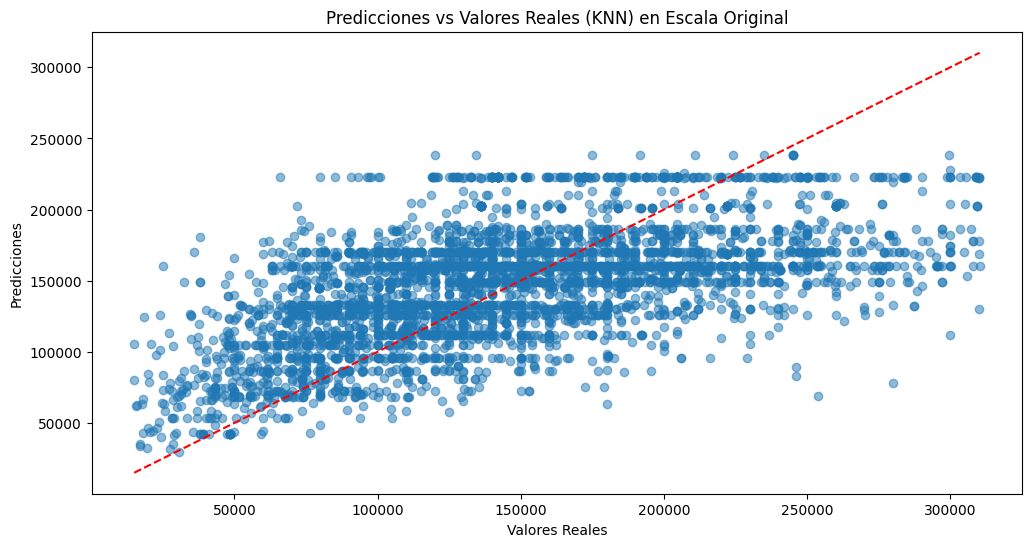

In [14]:
# Aplicar la transformación inversa de Box-Cox a los valores predichos y reales
def inverse_boxcox(y, fitted_lambda):
    if fitted_lambda == 0:
        return np.exp(y)
    else:
        return np.exp(np.log(fitted_lambda * y + 1) / fitted_lambda)

# Aplicar la transformación inversa a los valores predichos y reales
y_test_original = inverse_boxcox(y_test, fitted_lambda)
y_pred_best_knn_original = inverse_boxcox(y_pred_best_knn, fitted_lambda)

# Verificar si la transformación inversa se realizó correctamente
print("Valores reales originales:", y_test_original[:5])
print("Predicciones originales:", y_pred_best_knn_original[:5])

# Gráfico de dispersión de predicciones vs valores reales en escala original
plt.figure(figsize=(12, 6))
plt.scatter(y_test_original, y_pred_best_knn_original, alpha=0.5)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales (KNN) en Escala Original')
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], color='red', linestyle='--')
plt.show()

El gráfico de dispersión actualizado muestra la relación entre las predicciones del modelo KNN y los valores reales del salario en la escala original.

El gráfico muestra que hay una correlación positiva entre las predicciones del modelo KNN y los valores reales, ya que los puntos tienden a alinearse a lo largo de la línea roja (que representa la igualdad perfecta entre las predicciones y los valores reales).

Sin embargo, hay una dispersión considerable alrededor de la línea de igualdad, lo que indica que el modelo no es perfectamente preciso.

Las predicciones tienden a estar más agrupadas en ciertos rangos de salarios, lo que podría indicar una tendencia del modelo a predecir valores intermedios con más frecuencia.

Ejemplos de valores reales y sus correspondientes predicciones muestran una variabilidad significativa.
Por ejemplo, para un salario real de 300,000, el modelo predijo aproximadamente 222,852, lo cual es una subestimación considerable.
Para un salario real de 37,120, el modelo predijo aproximadamente 110,515, lo cual es una sobreestimación.

El modelo KNN ha mostrado ser una herramienta útil para predecir los salarios en carreras de Data Engineer, pero la precisión del modelo puede ser mejorada.

# **Ahora probaremos con el modelo de Random Forest. Este modelo es conocido por su capacidad para manejar grandes cantidades de datos y capturar interacciones complejas entre características, lo que podría mejorar el rendimiento de nuestras predicciones.**

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Definir los parámetros para el grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Realizar el grid search con validación cruzada
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_rf_model = grid_search.best_estimator_
print("Mejores parámetros:", grid_search.best_params_)

# Hacer predicciones en el conjunto de prueba
y_pred_rf = best_rf_model.predict(X_test)

# Calcular las métricas de evaluación
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Error Cuadrático Medio (MSE) - Random Forest:", mse_rf)
print("Coeficiente de Determinación (R²) - Random Forest:", r2_rf)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Mejores parámetros: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Error Cuadrático Medio (MSE) - Random Forest: 214362.9923819979
Coeficiente de Determinación (R²) - Random Forest: 0.4402939816422191


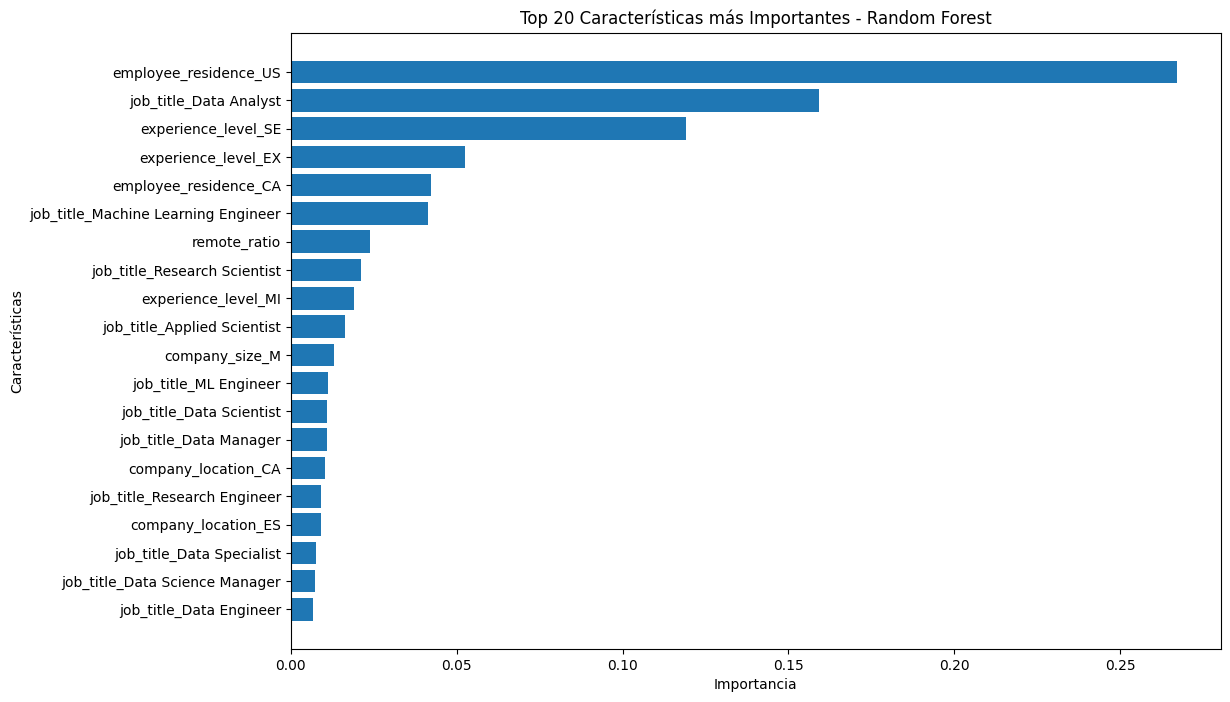

In [20]:
# Obtener la importancia de las características
feature_importances = best_rf_model.feature_importances_
features = X.columns

# Crear un DataFrame con las características y sus importancias
importance_df = pd.DataFrame({'Características': features, 'Importancia': feature_importances})
importance_df = importance_df.sort_values(by='Importancia', ascending=False).head(20)

# Visualizar la importancia de las características
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Características'], importance_df['Importancia'])
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Top 20 Características más Importantes - Random Forest')  # Ajusta el título según el número de características que estás mostrando
plt.gca().invert_yaxis()
plt.show()

### **Conclusiones**

- **Selección de características:** Las características seleccionadas para el análisis fueron experience_level, employment_type, job_title, remote_ratio, company_location y company_size. Estas características se consideraron relevantes para predecir el salario en USD de los ingenieros de datos.
- **Transformación de los datos:** Para mejorar la normalidad de los datos, se aplicó la transformación Box-Cox a la variable objetivo salary_in_usd. Esta transformación ayudó a que la variable objetivo se asemejara más a una distribución normal, lo que es beneficioso para el rendimiento de muchos algoritmos de aprendizaje automático.
- **Modelos Entrenados y Evaluados:**

  1.   **K-Nearest Neighbors (KNN):** Mejores parámetros: n_neighbors = 15.
Error Cuadrático Medio (MSE): 244814.80545347894 /
Coeficiente de Determinación (R²): 0.3491235291761565.
  2.   **Random Forest:** Mejores parámetros: max_depth = 30, min_samples_leaf = 1, min_samples_split = 5, n_estimators = 300. Error Cuadrático Medio (MSE): 214362.9923819979 / Coeficiente de Determinación (R²): 0.4402939816422191. El modelo Random Forest mostró un rendimiento superior al modelo anterior, con el MSE más bajo y el R² más alto, explicando aproximadamente el 44.03% de la variabilidad en el salario en USD.

- **Importancia de las características:** La visualización de la importancia de las características indicó que experience_level, job_title y company_location son los factores más influyentes en la determinación del salario de los ingenieros de datos.

- **Resultados:**

  *   El modelo de Random Forest ha demostrado ser la herramienta más eficaz entre las probadas para predecir los salarios en carreras de Data Engineer, con el mejor rendimiento en términos de MSE y R².
  *   Las características más influyentes para predecir el salario fueron el nivel de experiencia, el título del trabajo y la ubicación de la empresa. Esto sugiere que estos factores son cruciales para determinar los salarios en esta industria.
  * Sin embargo, el R² del 44.03% indica que hay una gran parte de la variabilidad en los salarios que no se explica por las características seleccionadas. Se podría seguir explorando y probando con otros modelos, así como considerar la inclusión de nuevas características que puedan mejorar la precisión del modelo utilizado. Además, se debe realizar una validación cruzada rigurosa para asegurarse de que los resultados sean robustos y generalizables a otros conjuntos de datos.

